## Validando o modelo Final

Para validar o modelo final, treinado com o dataset que foi rotulado de forma automática, vamos rotular os mesmos 3 datasets utilizados para validar o modelo inicial. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importa funções para redes neurais
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

import seaborn as sns
sns.set(context='talk', rc={'figure.figsize':(20,8)})

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from sklearn import metrics
import os

In [4]:
def predicao_M1(lista_texto, X_M1):
    tokenizer = Tokenizer(num_words=33000)
    tokenizer.fit_on_texts(X_M1)
    texto_token = tokenizer.texts_to_sequences(lista_texto)
    texto_padded_tokens = sequence.pad_sequences(texto_token, maxlen=250)
    return (M1_model.predict(texto_padded_tokens[:len(lista_texto)]) > .5).astype(int)
    #return model.predict(texto_padded_tokens[:len(lista_texto)]).argmax(1)
    
def predicao_M2(lista_texto, X_M2):
    tokenizer = Tokenizer(num_words=55000)
    tokenizer.fit_on_texts(X_M2)
    texto_token = tokenizer.texts_to_sequences(lista_texto)
    texto_padded_tokens = sequence.pad_sequences(texto_token, maxlen=250)
    return (M2_model_SM.predict(texto_padded_tokens[:len(lista_texto)]) > .5).astype(int)
    #return model.predict(texto_padded_tokens[:len(lista_texto)]).argmax(1)

In [5]:
data_M1 = pd.read_csv('dataset_com_sentimento.csv', index_col=0)
data_M2 = pd.read_csv('dataset_unificado.csv', index_col=0)

tokens_M1 = data_M1['full_text'].values.astype(str)
tokens_M2 = data_M2['full_text'].values.astype(str)

In [6]:
# Carregando json e criando o modelo M1
json_file = open('model_final_M1.json', 'r')
M1_model_json = json_file.read()
json_file.close()
M1_model = model_from_json(M1_model_json)
# Carregando pesos para o novo modelo
M1_model.load_weights("model_final_M1.h5")
print("Modelo carregado com Sucesso")

Modelo carregado com Sucesso


In [8]:
# Carregando json e criando o modelo M2
json_file = open('model_final_M2_SM.json', 'r')
M2_model_json = json_file.read()
json_file.close()
M2_model_SM = model_from_json(M2_model_json)
# Carregando pesos para o novo modelo
M2_model_SM.load_weights("model_final_M2_SM.h5")
print("Modelo carregado com Sucesso")

Modelo carregado com Sucesso


In [9]:
M1_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 250, 64)           2112000   
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 250, 64)           24832     
_________________________________________________________________
dropout_16 (Dropout)         (None, 250, 64)           0         
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 2,161,729
Trainable params: 2,161,729
Non-trainable params: 0
___________________________________________

#### 1 - Dataset IMDB
O Primeiro dataset são de avaliações de filmes do IMDB, são comentarios mais longos, em média 4x maiores do que o modelo treinado.

In [10]:
dataset_validacao = pd.read_csv('imdb_limpo.csv', index_col=0)
dataset_validacao.head()

,text_pt,sentiment
0,mais uma vez o sr costner arrumou um filme por...,0
1,este e um exemplo do motivo pelo qual a maiori...,0
2,primeiro de tudo eu odeio esses raps imbecis q...,0
3,nem mesmo os beatles puderam escrever musicas ...,0
4,filmes de fotos de latao nao e uma palavra apr...,0


<AxesSubplot:>

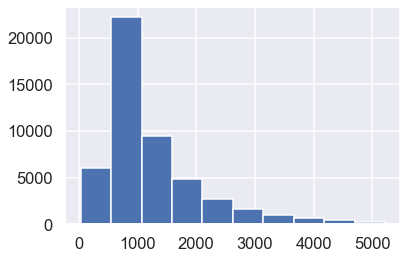

In [11]:
dataset_validacao['text_pt'].apply(len).hist()

In [203]:
# avaliando acuracia usando Modelo 1
y_pred_imdb = predicao_M1(dataset_validacao.text_pt, tokens_M1)
print("Acurácia:", metrics.accuracy_score(dataset_validacao.sentiment, y_pred_imdb))

Acurácia: 0.508663741685032


In [209]:
# avaliando acuracia usando Modelo 2
y_pred_imdb2_SM = predicao_M2(dataset_validacao.text_pt, tokens_M2)
print("M2 SM - Acurácia:", metrics.accuracy_score(dataset_validacao.sentiment, y_pred_imdb2_SM))

M2 SM - Acurácia: 0.6986594957439496


Na primeira rotulagem com a o modelo inicial treinado com reviews de APP, tivemos uma acurácia de 65%, já com o modelo final treinado com tweets a acurácia foi de 69%.

#### 2 - Dataset Tweets Aleatórios

O segundo dataset também são tweets, conforme nosso dataset alvo, porém são de assuntos aleatórios, o tamanho dos textos é menor do que foi treinado o modelo.

In [13]:
dataset_validacao2 = pd.read_csv('tweets_aleatorios_limpo.csv', index_col=0)

In [14]:
dataset_validacao2.head()

,tweet_text,sentiment
0,para eu ir,1
1,o meu like eu ja dei na epoca,1
2,eu so queria conseguir comer alguma coisa pra ...,1
3,d que lindo dia,1
4,pq da pr jeito e uma oferta ha q aproveitar p,1


<AxesSubplot:>

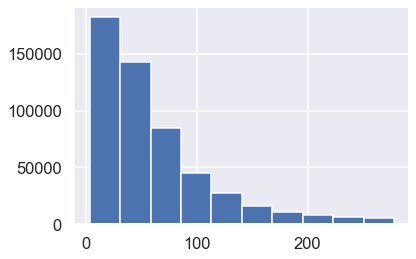

In [15]:
dataset_validacao2['tweet_text'].apply(len).hist()

In [201]:
# avaliando acuracia usando Modelo 1
y_pred_tweets = predicao_M1(dataset_validacao2.tweet_text, tokens_M1)
print("Acurácia:", metrics.accuracy_score(dataset_validacao2.sentiment, y_pred_tweets))

Acurácia: 0.4954057441410969


In [208]:
# avaliando acuracia usando Modelo 2
y_pred_tweets2_SM = predicao_M2(dataset_validacao2.tweet_text, tokens_M2)
print("M2 SM - Acurácia:", metrics.accuracy_score(dataset_validacao2.sentiment, y_pred_tweets2_SM))

M2 SM - Acurácia: 0.5360462219135057


Na primeira rotulagem com a o modelo inicial treinado com reviews de APP, tivemos uma acurácia de 52%, já com o modelo final treinado com tweets a acurácia foi de 53%.

#### 3 - Dataset Avaliações de produtos

Por fim vamos utilizar um outro dataset de avaliação, onde os textos são em média no tamanho do modelo treinado, este dataset também utiliza avaliações de 1 a 5, e, da mesma forma que o dataset utilizado para o treino do modelo, também vamos considerar apenas as avaliações 1 como negativas e 5 como positivas, além de possuirem um pouco de contexto.

In [17]:
dataset_validacao3 = pd.read_csv('B2W_limpo.csv', index_col=0)

In [18]:
dataset_validacao3.head()

,overall_rating,review_text
9,0,meu produto nao foi entregue e a americanas es...
13,0,esse celular nao vale nada a bateria nao vale ...
25,0,eu nao recebi o produto e a americanas sabe di...
31,0,nao recebi segundo o correio o endereco estava...
33,0,comprei o produto que veio com defeito montamo...


<AxesSubplot:>

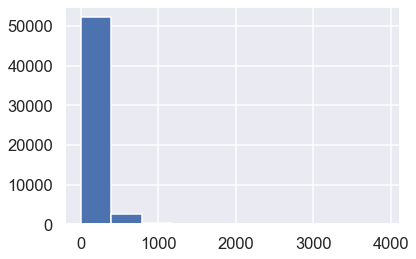

In [19]:
dataset_validacao3['review_text'].apply(len).hist()

In [199]:
# avaliando acuracia usando Modelo 1
y_pred_b2w_m1 = predicao_M1(dataset_validacao3.review_text, tokens_M1)
print("M1 - Acurácia:", metrics.accuracy_score(dataset_validacao3.overall_rating, y_pred_b2w_m1))

M1 - Acurácia: 0.5992761491132826


In [207]:
# avaliando acuracia usando Modelo 2
y_pred_b2w_m2_sm = predicao_M2(dataset_validacao3.review_text, tokens_M2)
print("M2 SM - Acurácia:", metrics.accuracy_score(dataset_validacao3.overall_rating, y_pred_b2w_m2_sm))

M2 SM - Acurácia: 0.9250452406804198


Na primeira rotulagem com a o modelo inicial treinado com reviews de APP, tivemos uma acurácia de 91%, já com o modelo final treinado com tweets a acurácia foi de 93%.

De uma forma geral o modelo final aumentou um pouco a acurácia, também é verdade que o número de palavras tokenizadas do dataset aumentou. Mas o resultado esperado era este mesmo.

#### Validando com as empresas Netflix, Ponto Frio e Nubank

Se nos outros três datasets estavamos em um contexto bem diferente, neste estamos dentro do contexto, pois são empresas tiradas do dataset rotulado para uma validação.

In [21]:
#importa dataset
df = pd.read_csv('dataset_com_sentimento.csv', index_col=0)

In [22]:
df.head(1)

,in_reply_to_screen_name,full_text,sentimento,sentimento_CNN,sentimento_RNN,pesos_RNN,sentimento_medio
0,santander_br,isso qualquer operacao que eu tente fazer em ...,0,0,0,0.00211,0


In [23]:
# carregando os dataset individuais
pontofrio = df[(df['in_reply_to_screen_name'] == 'pontofrio')]
nubank = df[(df['in_reply_to_screen_name'] == 'nubank')]
netflix = df[(df['in_reply_to_screen_name'] == 'NetflixBrasil')]

In [24]:
df['sentimento'].value_counts()

1    69589
0    52935
Name: sentimento, dtype: int64

In [25]:
pontofrio['sentimento'].value_counts()

1    3069
0    2093
Name: sentimento, dtype: int64

In [26]:
nubank['sentimento'].value_counts()

0    5430
1    2807
Name: sentimento, dtype: int64

In [27]:
netflix['sentimento'].value_counts()

1    28170
0    10368
Name: sentimento, dtype: int64

Tanto no geral quanto nos datasets individuais, a tendencia é de tweets com sentimento positivo.

**Dataset rotulado, com as 3 empresas junto**

In [31]:
# Modelo 1 
y_pred_amostra = predicao_M1(df.full_text,tokens_M1)
print("Acurácia:", metrics.accuracy_score(df.sentimento_medio, y_pred_amostra))

Acurácia: 0.5662808919068917


In [33]:
# Modelo 2 - Sentimento Médio
y_pred_amostra2_SM = predicao_M2(df.full_text,tokens_M2)
print("Acurácia:", metrics.accuracy_score(df.sentimento_medio, y_pred_amostra2_SM))

Acurácia: 0.9057817243968529


**Apenas Ponto Frio**

In [35]:
#Modelo 1 - pontofrio
y_pred_pontofrio_m1 = predicao_M1(pontofrio.full_text,tokens_M1)
print("M1 - Acurácia Pontofrio:", metrics.accuracy_score(pontofrio.sentimento_medio, y_pred_pontofrio_m1))

M1 - Acurácia Pontofrio: 0.5856257264626114


In [37]:
#Modelo 2 SM - pontofrio
y_pred_pontofrio_m2_sm = predicao_M2(pontofrio.full_text,tokens_M2)
print("M2 SM - Acurácia Pontofrio:", metrics.accuracy_score(pontofrio.sentimento_medio, y_pred_pontofrio_m2_sm))

M2 SM - Acurácia Pontofrio: 0.8760170476559473


**Apenas Netflix**

In [51]:
#Modelo 1 - netflix
y_pred_netflix_m1 = predicao_M1(netflix.full_text,tokens_M1)
print("M1 - Acurácia Netflix:", metrics.accuracy_score(netflix.sentimento_medio, y_pred_netflix_m1))

M1 - Acurácia Netflix: 0.5267787638175307


In [53]:
#Modelo 2 SM- netflix
y_pred_netflix_m2_sm = predicao_M2(netflix.full_text,tokens_M2)
print("M2 - Acurácia Netflix:", metrics.accuracy_score(netflix.sentimento_medio, y_pred_netflix_m2_sm))

M2 - Acurácia Netflix: 0.8786652135554518


**Apenas Nubank**

In [48]:
#Modelo 1 - Nubank
y_pred_nubank_m1 = predicao_M1(nubank.full_text,tokens_M1)
print("M1 - Acurácia Nubank:", metrics.accuracy_score(nubank.sentimento_medio, y_pred_nubank_m1))

M1 - Acurácia Nubank: 0.5653757435959694


In [50]:
#Modelo 2 SM- Nubank
y_pred_nubank_m2_sm = predicao_M2(nubank.full_text,tokens_M2)
print("M2 - Acurácia Nubank:", metrics.accuracy_score(nubank.sentimento_medio, y_pred_nubank_m2_sm))

M2 - Acurácia Nubank: 0.8499453684593905


Novamente o Modelo 2, treinado com os dois datasets, se saiu melhor, trazendo resultados acima de 85% em dados nunca vistos.

**Analisando os Erros**

In [44]:
data = pd.read_csv('dataset_com_sentimento.csv', index_col=0)

In [47]:
# Verificando qual modelo teve maior acurácia em relação a média 
print("Acurácia SVM:", metrics.accuracy_score(data.sentimento, data.sentimento_medio))
print('-----------')
print("Acurácia CNN:", metrics.accuracy_score(data.sentimento_CNN, data.sentimento_medio))
print('-----------')
print("Acurácia RNN:", metrics.accuracy_score(data.sentimento_RNN, data.sentimento_medio))

Acurácia SVM: 0.8484215337403285
-----------
Acurácia CNN: 0.9202523587215566
-----------
Acurácia RNN: 0.9197381737455519


Para realizar uma análise mais subjetiva, irei utilizar o dataset referente a empresa Ponto Frio.

In [96]:
def predicao_pesos(lista_texto, tokens):
    tokenizer = Tokenizer(num_words=61000)
    tokenizer.fit_on_texts(tokens)
    texto_token = tokenizer.texts_to_sequences(lista_texto)
    texto_padded_tokens = sequence.pad_sequences(texto_token, maxlen=250)
    return M2_model_SM.predict(texto_padded_tokens[:len(lista_texto)])

In [97]:
y_pred_pontofrio_m2_pesos = predicao_pesos(pontofrio.full_text,tokens_M2)

In [98]:
pontofrio["predicao"] = y_pred_pontofrio_m2_sm
pontofrio["pesos_RNN"] = y_pred_pontofrio_m2_pesos

C:\Users\LBKnaak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\LBKnaak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
len(pontofrio)

5162

In [99]:
pontofrio[(pontofrio["predicao"] != pontofrio["sentimento_medio"])]

,in_reply_to_screen_name,full_text,sentimento,sentimento_CNN,sentimento_RNN,pesos_RNN,sentimento_medio,predicao
1646,pontofrio,me ajuda meu pedido ainda nao foi enviado,0,1,1,0.218363,1,0
1765,pontofrio,como voce ta escrevendo se voce e um pinguim,0,1,1,0.109524,1,0
1775,pontofrio,sera que eu vou ter que esperar ate a black d...,0,1,1,0.062288,1,0
1785,pontofrio,nao tenho uma posicao,0,1,1,0.254677,1,0
1818,pontofrio,bo tira foto junto pinguim,0,0,1,0.994090,0,1
...,...,...,...,...,...,...,...,...
121576,pontofrio,dim dim dim ta com nada esse pinguim ta com c...,0,1,1,0.219579,1,0
122288,pontofrio,que tudo pin se for mesmo me avisa que ja dei...,0,1,1,0.023606,1,0
130286,pontofrio,pin qual o segredo para tira uma ferias boa t...,0,1,1,0.053559,1,0
132318,pontofrio,quero promocao do paperwhite,1,1,1,0.432315,1,0


A acurácia neste dataset de validação foi 88%, ao todo foram 640 erros em 5162 tweets analisados.

A primeira suspeita é quanto aos tweets inclinados a uma classificação neutra, para isso vamos verificar a média dos pesos nos acertos para comparar com a média dos pesos dos erros.

In [100]:
#pesos no dataset
print('Media : ',pontofrio['pesos_RNN'].mean())
print('Mediana : ',pontofrio['pesos_RNN'].median())

Media :  0.6511529088020325
Mediana :  0.9776984453201294


In [101]:
print('Media Positivo: ',pontofrio['pesos_RNN'][(pontofrio["sentimento_medio"] == 1)].mean())
print('Media Negativo: ',pontofrio['pesos_RNN'][(pontofrio["sentimento_medio"] == 0)].mean())

Media Positivo:  0.8688092827796936
Media Negativo:  0.1476636528968811


In [103]:
print('Media Verdadeiro Positivo: ',pontofrio['pesos_RNN'][(pontofrio["predicao"] == 1) 
                                        & (pontofrio["sentimento_medio"] == 1)].mean())
print('Media Verdadeiro Negativo: ',pontofrio['pesos_RNN'][(pontofrio["predicao"] == 0) 
                                        & (pontofrio["sentimento_medio"] == 0)].mean())

Media Verdadeiro Positivo:  0.9670150279998779
Media Verdadeiro Negativo:  0.04696894809603691


In [102]:
print('Media Falso Positivo: ',pontofrio['pesos_RNN'][(pontofrio["predicao"] == 1) 
                                        & (pontofrio["sentimento_medio"] == 0)].mean())
print('Media Falso Negativo: ',pontofrio['pesos_RNN'][(pontofrio["predicao"] == 0) 
                                        & (pontofrio["sentimento_medio"] == 1)].mean())

Media Falso Positivo:  0.8353217244148254
Media Falso Negativo:  0.16444970667362213


In [94]:
#total de erros negativos
print('Total de Erros Negativos: ', len(pontofrio[(pontofrio["predicao"] != pontofrio["sentimento_medio"]) 
                                              & (pontofrio["sentimento_medio"] == 0)]))
print('Total de Erros Positivos: ', len(pontofrio[(pontofrio["predicao"] != pontofrio["sentimento_medio"]) 
                                              & (pontofrio["sentimento_medio"] == 1)]))

Total de Erros Negativos:  199
Total de Erros Positivos:  441


Como é possivel verificar, a média dos pesos nos falsos positivos cai para 0,83 contra os verdadeiros positivos que é de quase 0.97, confirmando a suspeita dos comentarios neutros. Esse mesmo comportamento ocorre nos falsos negativos. 

Vamos listar alguns dos erros para avaliarmos individual, para avaliar outra hipotese, que seriam os erros de rotulagem.

In [104]:
# modelo previu negativo, mas era positivo
pontofrio['full_text'][(pontofrio["predicao"] != pontofrio["sentimento_medio"]) 
                       & (pontofrio["sentimento_medio"] == 1)].values

array([' me ajuda meu pedido ainda nao foi enviado ',
       ' como voce ta escrevendo se voce e um pinguim ',
       ' sera que eu vou ter que esperar ate a black de pra receber o pedido que fiz em ',
       ' nao tenho uma posicao',
       ' boa tarde gostaria de saber se meu pedido saiu para entrega pedido ',
       ' boa tarde eu e a compramos uma maquina de lavar pedido no dia data de ',
       ' gostaria de saber quando pagam os pontos da minha compra no ponto frio com parceria a livelo sao meses ja sem nenhuma solucao',
       ' eu odeio sardinha mas farei esse sacrificio por voce ',
       ' a mentira que foi tao rapido assim ansiosa pra chegar ja ',
       ' aguardando a resposta do meu caso comprei um item a receber uma pontuacao que o site mesmo mostrava rec ',
       ' boa noite mas eu ja fiz o pedido de troca to so aguardando virem buscar pra poder receber o novo ne',
       ' obrigado pela atencao estou na rua agora acima enviei o protocolo do o atendimento que me encamin

In [105]:
# modelo previu positivo, mas era negativo
pontofrio['full_text'][(pontofrio["predicao"] != pontofrio["sentimento_medio"]) & (pontofrio["sentimento_medio"] == 0)].values

array([' bo tira foto junto pinguim ',
       ' olha so se eu estou dando autorizacao pra outra pessoa buscar ela pode levar meus documentos digitaliz ',
       ' eis o pedido comprei no hotsite da promo tudo azul que dava pontos por real pagando com cartao de cr ',
       ' segue pix dce b eaeacec',
       ' onde esta meus pontos tudo azul referente ao pedido na promocao abaixo ate hoje nada ',
       ' da uma olhada nessa reclamacao contra no ',
       ' alguma previsao de playstation nas lojas fisicas ',
       ' air fryer e assistente virtual pra lembrar de nao queimar a batata',
       ' oq uma coisa tem a ve com a outra ',
       ' com a vitoria do meu inter ',
       ' este e o certo o outro era do rastreio desculpe ',
       ' uma piscina ai queria um cupom ',
       ' de mas quando se e algo do bem sempre vale ler coisas boas nunca tem prazo de validade ',
       ' e o prejuizo fica com quem ',
       ' isto nao seria caso de policia ministerio publico ou algum orgao competen 

Analisando o conteúdo dos tweets, além de muitos comentários neutros, percebe-se que muitos realmente foram rotulados de forma errada pelos modelos, induzindo o modelo final ao erro também. Obviamente isso era esperado em uma rotulagem "não supervisionada". Com certeza também existem acertos que foram rotulados errado.